<a href="https://colab.research.google.com/github/sam14243/Stack_Overflow_Tagging/blob/Anantha/Stack_Tag_RoBERTa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/archive/'
# path1 = '/content/drive/My Drive/archive1/'
# path2 = '/content/drive/My Drive/archive2/'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
questions_df = pd.read_csv(path + 'Questions.csv', encoding = "ISO-8859-1")
# answers_df = pd.read_csv(path + 'Answers.csv', encoding = "ISO-8859-1")
tags_df = pd.read_csv(path + 'Tags.csv')

In [ ]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1264216 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1264216 non-null  object 
 3   ClosedDate    55959 non-null    object 
 4   Score         1264216 non-null  int64  
 5   Title         1264216 non-null  object 
 6   Body          1264216 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


In [ ]:
# 1264216
# 188015 #score > 2
# 126833 #3
# 72950 #5

In [ ]:
188015/1264216

0.14872063001892083

Top 15 tags
Why most occurance? To fine tune RoBERTa, enough data points are required
Why 15? For GPU storage capacity

In [ ]:
pred_tags = np.array(tags_df['Tag'].value_counts().head(15).index)

In [ ]:
questions_df = questions_df[questions_df['Score'] > 4]

In [ ]:
questions_df.drop(['OwnerUserId','CreationDate', 'ClosedDate', 'Score'], axis = 1, inplace = True)

<ipython-input-7-18da3cdf091b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_df.drop(['OwnerUserId','CreationDate', 'ClosedDate', 'Score'], axis = 1, inplace = True)


In [ ]:
questions_df.reset_index(drop=True, inplace=True)

In [ ]:
questions_df

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
...,...,...,...
93148,40120130,CMFCMenuButton not properly repainting when to...,"<p>In an C++ MFC project I'm using <a href=""ht..."
93149,40123880,How can I force file ordering in F# projects u...,<p>I'm trying to work with vscode in my WebSha...
93150,40125310,Why does my result data returned as void* gets...,<p>I am working in a project with a huge legac...
93151,40129230,Do I need to extend FirebaseInstanceIdService ...,<p>I want to manage topic subscription from th...


In [ ]:
questions_df['Body'][0]

'<p>I\'ve written a database generation script in <a href="http://en.wikipedia.org/wiki/SQL">SQL</a> and want to execute it in my <a href="http://en.wikipedia.org/wiki/Adobe_Integrated_Runtime">Adobe AIR</a> application:</p>\n\n<pre><code>Create Table tRole (\n      roleID integer Primary Key\n      ,roleName varchar(40)\n);\nCreate Table tFile (\n    fileID integer Primary Key\n    ,fileName varchar(50)\n    ,fileDescription varchar(500)\n    ,thumbnailID integer\n    ,fileFormatID integer\n    ,categoryID integer\n    ,isFavorite boolean\n    ,dateAdded date\n    ,globalAccessCount integer\n    ,lastAccessTime date\n    ,downloadComplete boolean\n    ,isNew boolean\n    ,isSpotlight boolean\n    ,duration varchar(30)\n);\nCreate Table tCategory (\n    categoryID integer Primary Key\n    ,categoryName varchar(50)\n    ,parent_categoryID integer\n);\n...\n</code></pre>\n\n<p>I execute this in Adobe AIR using the following methods:</p>\n\n<pre><code>public static function RunSqlFromFile

Preprocessing the data:
Removing the html tags and removing symbols

In [ ]:
from bs4 import BeautifulSoup
import re
def preprocess_text(df):
  soup = BeautifulSoup(df['Body'], 'html.parser')
  clean_text = soup.get_text()
  clean_text = re.sub("[^a-zA-Z]", ' ', clean_text)
  clean_text = clean_text.lower()
  tokens = clean_text.split()
  return " ".join(tokens)

In [ ]:
questions_df['Clean_body'] = questions_df.apply(preprocess_text, axis=1)

In [ ]:
questions_df

,Id,Title,Body,Clean_body
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,i ve written a database generation script in s...
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,are there any really good tutorials explaining...
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,has anyone got experience creating sql based a...
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,this is something i ve pseudo solved many time...
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,i have a little game written in c it uses a da...
...,...,...,...,...
93148,40120130,CMFCMenuButton not properly repainting when to...,"<p>In an C++ MFC project I'm using <a href=""ht...",in an c mfc project i m using cmfcmenubutton u...
93149,40123880,How can I force file ordering in F# projects u...,<p>I'm trying to work with vscode in my WebSha...,i m trying to work with vscode in my websharpe...
93150,40125310,Why does my result data returned as void* gets...,<p>I am working in a project with a huge legac...,i am working in a project with a huge legacy c...
93151,40129230,Do I need to extend FirebaseInstanceIdService ...,<p>I want to manage topic subscription from th...,i want to manage topic subscription from the c...


In [ ]:
id = list(questions_df['Id'].unique())
len(id)

93153

In [ ]:
new_tags_df = tags_df[tags_df['Id'].isin(id)]
new_tags_df.reset_index(drop=True, inplace=True)

Taking the top 15 tags for prediction


In [ ]:
new_tags_df = new_tags_df[new_tags_df['Tag'].isin(pred_tags)]

In [ ]:
l = list(new_tags_df['Tag'].value_counts())

In [ ]:
new_tags_df['Tag'].value_counts()

c#             8909
java           8695
javascript     7118
android        6376
python         5667
c++            5518
php            3993
jquery         3599
ios            3438
html           2695
css            2437
objective-c    2256
sql            1828
asp.net        1724
mysql          1657
Name: Tag, dtype: int64

<BarContainer object of 15 artists>

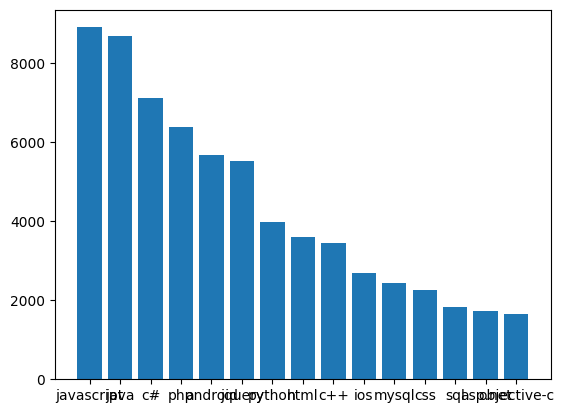

In [ ]:
import matplotlib.pyplot as plt
x = pred_tags
y = l
plt.bar(x, y)

In [ ]:
merged_df = questions_df.merge(new_tags_df, on='Id', how='left')

result_df = merged_df.groupby('Id')['Tag'].agg(list).reset_index()

new_questions_df = questions_df.merge(result_df, on='Id', how='left')

In [ ]:
new_questions_df = new_questions_df.drop(['Id', 'Title', 'Body'], axis = 1)

In [ ]:
new_questions_df['Tag'].value_counts()

[nan]                                     36954
[c#]                                       7771
[java]                                     7507
[android]                                  5402
[python]                                   5375
                                          ...  
[c#, javascript, jquery, asp.net, css]        1
[asp.net, ios]                                1
[java, c++, mysql]                            1
[java, android, objective-c, ios]             1
[javascript, php, html, mysql]                1
Name: Tag, Length: 286, dtype: int64

Filter the DataFrame(Dropping the nan values)
56199 points left

In [ ]:
new_questions_df = new_questions_df[~new_questions_df['Tag'].apply(lambda x: x == [np.nan])]
new_questions_df.reset_index(drop=True, inplace=True)

In [ ]:
new_questions_df['Tag'].value_counts().head(10)
# c#,java,javascript,android,python,c++

[c#]                    7771
[java]                  7507
[android]               5402
[python]                5375
[c++]                   5230
[javascript]            4155
[php]                   3127
[ios]                   2249
[jquery]                1325
[javascript, jquery]    1306
Name: Tag, dtype: int64

In [ ]:
def drop_random_rows(df, column_name, condition_value, n):
    condition_rows = df[df[column_name].apply(lambda x: x == [condition_value])]
    n = min(n, len(condition_rows))
    rows_to_drop = np.random.choice(condition_rows.index, size=n, replace=False)
    df_dropped = df.drop(rows_to_drop)
    # print(rows_to_drop)
    return df_dropped
new_questions_df = drop_random_rows(new_questions_df, 'Tag', 'java', 5000)
new_questions_df = drop_random_rows(new_questions_df, 'Tag', 'c#', 5000)
new_questions_df = drop_random_rows(new_questions_df, 'Tag', 'android', 3000)
new_questions_df = drop_random_rows(new_questions_df, 'Tag', 'python', 3000)
new_questions_df = drop_random_rows(new_questions_df, 'Tag', 'c++', 3000)
new_questions_df = drop_random_rows(new_questions_df, 'Tag', 'javascript', 2000)
new_questions_df = drop_random_rows(new_questions_df, 'Tag', 'php', 1000)
new_questions_df['Tag'].value_counts().head(10)

# n_rows_to_drop = 1000
# condition_value_to_drop = 'java'
# pp = drop_random_rows(new_questions_df, 'Tag', 'java', 5000)
# pp = drop_random_rows(pp, 'Tag', 'c#', 3300)
# pp = drop_random_rows(pp, 'Tag', 'android', 3000)
# pp  = drop_random_rows(pp, 'Tag', 'python', 3000)
# pp  = drop_random_rows(pp, 'Tag', 'c++', 2400)
# pp = drop_random_rows(pp, 'Tag', 'javascript', 1500)
# pp = drop_random_rows(pp, 'Tag', 'php', 1000)
# new_questions_df
# [java]             2456
# [c#]               2421
# [android]          2369
# [python]           2340
# [c++]              2272
# [javascript]       2197
# [php]              2109
# [c#, .net]         2029
# [ios]              1729
# [ruby-on-rails]    1723

[c#]                    2771
[java]                  2507
[android]               2402
[python]                2375
[ios]                   2249
[c++]                   2230
[javascript]            2155
[php]                   2127
[jquery]                1325
[javascript, jquery]    1306
Name: Tag, dtype: int64

In [ ]:
new_questions_df['Tag'].value_counts().head(10)
# c#,java,javascript,android,python,c++

[java]             7456
[c#]               5721
[android]          5369
[python]           5340
[c++]              4672
[javascript]       3697
[php]              3109
[c#, .net]         2029
[ios]              1729
[ruby-on-rails]    1723
Name: Tag, dtype: int64

In [ ]:
new_questions_df['Tag'].value_counts()

[java]                                    3591
[c#]                                      3485
[android]                                 3482
[python]                                  3465
[c++]                                     3390
                                          ... 
[c#, javascript, jquery, asp.net, css]       1
[c#, .net, objective-c]                      1
[c++, objective-c, c]                        1
[javascript, iphone, sql, ios]               1
[jquery, ios, iphone]                        1
Name: Tag, Length: 410, dtype: int64

In [ ]:
# def drop_random_rows(df, column_name, condition_value, n):
#     condition_rows = df[df[column_name].apply(lambda x: condition_value in x)]
#     n = min(n, len(condition_rows))
#     rows_to_drop = np.random.choice(condition_rows.index, size=n, replace=False)
#     df_dropped = df.drop(rows_to_drop)

#     return df_dropped

# n_rows_to_drop = 1000
# condition_value_to_drop = 'java'
# new_questions_df = drop_random_rows(new_questions_df, 'Tag', 'java', 3500)
# new_questions_df = drop_random_rows(new_questions_df, 'Tag', 'c#', 3500)
# new_questions_df = drop_random_rows(new_questions_df, 'Tag', 'android', 2100)
# new_questions_df = drop_random_rows(new_questions_df, 'Tag', 'python', 2000)
# new_questions_df = drop_random_rows(new_questions_df, 'Tag', 'c++', 1500)
# new_questions_df = drop_random_rows(new_questions_df, 'Tag', 'javascript', 700)
# new_questions_df['Tag'].value_counts().head(10)
# # new_questions_df

In [ ]:
pp

,Clean_body,Tag
0,has anyone got experience creating sql based a...,"[sql, asp.net]"
1,i have a little game written in c it uses a da...,"[c#, .net]"
3,i ve been writing a few web services for a net...,[.net]
5,what s the simplest way to connect and query a...,[c#]
6,i need to grab the base encoded representation...,"[c#, asp.net]"
...,...,...
62061,as stated by namespace udecl a using declarati...,[c++]
62062,i have a method gen coroutine def my func x re...,[python]
62063,i have the following example code class a publ...,[c++]
62069,in an c mfc project i m using cmfcmenubutton u...,[c++]


In [ ]:
# [java]             3591
# [c#]               3485
# [android]          3482
# [python]           3465
# [c++]              3390
# [javascript]       3344
# [php]              3109
# [ios]              1729
# [ruby-on-rails]    1723
# [c]                1656
new_questions_df['Tag']

0        [sql, asp.net]
1            [c#, .net]
2                 [c++]
3                [.net]
4                  [c#]
              ...      
62067          [python]
62068          [python]
62069             [c++]
62070             [c++]
62071         [android]
Name: Tag, Length: 62072, dtype: object

In [ ]:
new_questions_df.reset_index(drop=True, inplace=True)
x = new_questions_df.iloc[:,:-1]
y = new_questions_df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
yt = mlb.fit_transform(y)

print(yt[0])
print(mlb.inverse_transform(yt[0].reshape(1,-1)))
print(mlb.classes_)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
[('asp.net', 'sql')]
['android' 'asp.net' 'c#' 'c++' 'css' 'html' 'ios' 'java' 'javascript'
 'jquery' 'mysql' 'objective-c' 'php' 'python' 'sql']


In [ ]:
x1 = x['Clean_body'].values

In [ ]:
from sklearn.model_selection import train_test_split

x_tr,x_test,y_tr,y_test = train_test_split(x1, yt, test_size=0.1, random_state=42, shuffle=True)

x_train,x_val,y_train,y_val = train_test_split(x_tr, y_tr, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
len(x_train) ,len(x_val), len(x_test)

(24623, 6156, 3420)

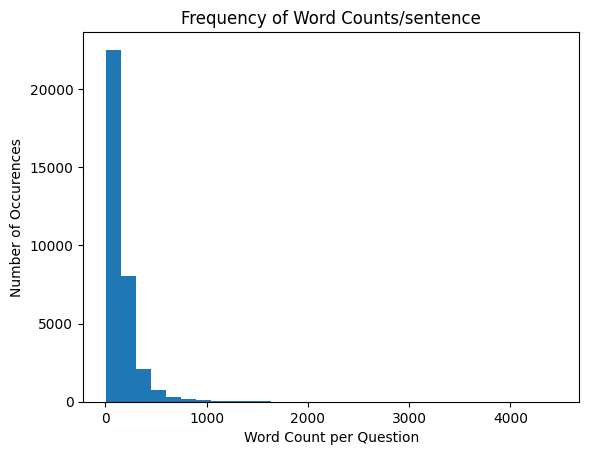

In [ ]:
import matplotlib.pyplot as plt
questions = x1
word_cnt = [len(quest.split()) for quest in questions]
plt.hist(word_cnt, bins = 30)
plt.xlabel('Word Count per Question')
plt.ylabel('Number of Occurences')
plt.title("Frequency of Word Counts/sentence")
plt.show()

Most of the questions have word count < 400
We take 400 words per sentence




Main Model

In [ ]:
!pip install -q pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 10.6 MB/s eta 0:00:00


In [ ]:
import transformers
from transformers import AutoModel, AutoTokenizer, AdamW, get_linear_schedule_with_warmup

import torch
from torch import nn, cuda
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler

import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint

In [ ]:
# Class for encoding the inputs and declaring the parameters
class tagsDataset(Dataset):

  def __init__(self, quest, tags, tokenizer, max_len):
    self.text = quest
    self.tokenizer = tokenizer
    self.labels = tags
    self.max_len = max_len

  def __len__(self):
    return len(self.text)

  def __getitem__(self, item_idx):
    text = self.text[item_idx]
    inputs = self.tokenizer.encode_plus(
        text,
        None,
        add_special_tokens=True,
        max_length=self.max_len,
        padding= 'max_length',
        return_token_type_ids = False,
        return_attention_mask = True,
        truncation = True,
        return_tensors = 'pt'
    )
    input_ids = inputs['input_ids'].flatten()
    attention_mask = inputs['attention_mask'].flatten()
    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'label':torch.tensor(self.labels[item_idx], dtype=torch.float)
    }


# Changed num_workers parameter in validation data loader, check it once

In [ ]:
#Defining a class for the data module and initialising dataloader
class tagsDatamodule(pl.LightningDataModule):
  def __init__(self, x_train, y_train, x_val, y_val, x_test, y_test, tokenizer, batch_size = 32, max_token_len = 300):
        super().__init__()
        self.tr_text = x_train
        self.tr_label = y_train
        self.val_text = x_val
        self.val_label = y_val
        self.test_text = x_test
        self.test_label = y_test
        self.tokenizer = tokenizer
        self.batch_size = batch_size
        self.max_token_len = max_token_len
  def setup(self, stage=None):
        self.train_dataset = tagsDataset(quest=self.tr_text, tags=self.tr_label, tokenizer=self.tokenizer,max_len = self.max_token_len)
        self.val_dataset  = tagsDataset(quest=self.val_text, tags=self.val_label, tokenizer=self.tokenizer,max_len = self.max_token_len)
        self.test_dataset  = tagsDataset(quest=self.test_text, tags=self.test_label, tokenizer=self.tokenizer,max_len = self.max_token_len)
  def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size = self.batch_size,shuffle = True, num_workers=2)
  def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size = 32) #
  def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size = 32)

In [ ]:
MODEL_NAME = "distilroberta-base" # we will use the smaller version of RoBERTa base model
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
max_word_cnt = 400
quest_cnt = 0

for question in questions:

    input_ids = tokenizer.encode(question, add_special_tokens=True)

    # Update the maximum sentence length.
    if len(input_ids) > max_word_cnt:
        quest_cnt +=1

print('Question having word count >', max_word_cnt, ':', quest_cnt)

In [ ]:
N_EPOCHS = 18
BATCH_SIZE = 64
MAX_LEN = 350
LR = 2e-05

In [ ]:
data_module = tagsDatamodule(x_train, y_train, x_val, y_val, x_test, y_test, tokenizer, BATCH_SIZE, MAX_LEN)
data_module.setup()

In [ ]:
class tagsClassifier(pl.LightningModule):
    def __init__(self, n_classes=15, steps_per_epoch=None, n_epochs=10, lr=1e-5):
        super().__init__()

        self.roberta = AutoModel.from_pretrained(MODEL_NAME, return_dict=True)
        self.classifier = nn.Linear(self.roberta.config.hidden_size,n_classes)
        self.steps_per_epoch = steps_per_epoch
        self.n_epochs = n_epochs
        self.lr = lr
        self.criterion = nn.BCEWithLogitsLoss()

    def forward(self,input_ids, attn_mask):
        output = self.roberta(input_ids = input_ids ,attention_mask = attn_mask)
        output = self.classifier(output.pooler_output)
        return output

    def training_step(self,batch,batch_idx):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['label']

        outputs = self(input_ids,attention_mask)
        loss = self.criterion(outputs,labels)
        self.log('train_loss',loss , prog_bar=True,logger=True)
        return {"loss" :loss, "predictions":outputs, "labels": labels }


    def validation_step(self,batch,batch_idx):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['label']

        outputs = self(input_ids,attention_mask)
        loss = self.criterion(outputs,labels)
        self.log('val_loss',loss , prog_bar=True,logger=True)
        return loss

    def test_step(self,batch,batch_idx):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['label']

        outputs = self(input_ids,attention_mask)
        loss = self.criterion(outputs,labels)
        self.log('test_loss',loss , prog_bar=True,logger=True)
        return loss


    def configure_optimizers(self):
        optimizer = AdamW(self.parameters() , lr=self.lr)
        warmup_steps = self.steps_per_epoch//3
        total_steps = self.steps_per_epoch * self.n_epochs - warmup_steps
        scheduler = get_linear_schedule_with_warmup(optimizer,warmup_steps,total_steps)
        return [optimizer], [scheduler]

In [ ]:
steps_per_epoch = len(x_train)//BATCH_SIZE
model = tagsClassifier(n_classes=15, steps_per_epoch=steps_per_epoch, n_epochs=N_EPOCHS, lr=LR)

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [ ]:
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    filename='Tag-{epoch:02d}-{val_loss:.2f}',
    save_top_k=3, #save the top 3 models
    mode='min', #mode of the monitored quantity  for optimization
)

In [ ]:
pip install -U 'torch_xla>=1.13'

In [ ]:
trainer = pl.Trainer(max_epochs = N_EPOCHS , accelerator="gpu", devices="1", callbacks=[checkpoint_callback])

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
torch.cuda.empty_cache()

In [ ]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |
|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |

In [ ]:
trainer.fit(model, data_module)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type              | Params
-------------------------------------------------
0 | roberta    | RobertaModel      | 82.1 M
1 | classifier | Linear            | 11.5 K
2 | criterion  | BCEWithLogitsLoss | 0     
-------------------------------------------------
82.1 M    Trainable params
0         Non-trainable params
82.1 M    Total params
328.520   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=18` reached.


In [ ]:
trainer.test(model, datamodule=data_module)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.10217530280351639    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.10217530280351639}]

In [ ]:
trainer.save_checkpoint("/content/drive/MyDrive/archive/model_roberta1.ckpt")

In [ ]:
# from_pretrained method
# loaded_model = MyModel()
# loaded_model.model = AutoModel.from_pretrained("/content/drive/MyDrive/archive/model")

Prediction of the Tags

In [ ]:
from torch.utils.data import TensorDataset

input_ids = []
attention_masks = []
# Tokenise in x_test

for quest in x_test:
    encoded_quest =  tokenizer.encode_plus(
                    quest,
                    None,
                    add_special_tokens=True,
                    max_length= MAX_LEN,
                    padding = 'max_length',
                    return_token_type_ids= False,
                    return_attention_mask= True,
                    truncation=True,
                    return_tensors = 'pt'
    )
    input_ids.append(encoded_quest['input_ids'])
    attention_masks.append(encoded_quest['attention_mask'])

# Lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(y_test)

# Set the batch size.
TEST_BATCH_SIZE = 64

# Create the DataLoader.
pred_data = TensorDataset(input_ids, attention_masks, labels)
pred_sampler = SequentialSampler(pred_data)
pred_dataloader = DataLoader(pred_data, sampler=pred_sampler, batch_size=TEST_BATCH_SIZE)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

# Tracking variables
pred_outs, true_labels = [], []

for batch in pred_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_attn_mask, b_labels = batch

    with torch.no_grad():
        pred_out = model(b_input_ids,b_attn_mask)
        pred_out = torch.sigmoid(pred_out)
        pred_out = pred_out.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
    pred_outs.append(pred_out)
    true_labels.append(label_ids)

In [ ]:
pred_prob = np.concatenate(pred_outs, axis=0)
y_true = np.concatenate(true_labels, axis=0)

In [ ]:
pred_prob[0]

array([0.00428903, 0.00369611, 0.00205743, 0.9896633 , 0.004519  ,
       0.00279751, 0.00563102], dtype=float32)

In [ ]:
y_pred = []
for row in pred_prob:
  temp = []
  for i in row:
    if i >= 0.5:
      temp.append(1)
    else:
      temp.append(0)
  y_pred.append(temp)

In [ ]:
y_pred[0]

[0, 0, 0, 1, 0, 0, 0]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       344
           1       0.83      0.60      0.70       161
           2       0.79      0.62      0.69       385
           3       0.89      0.77      0.82       271
           4       0.84      0.78      0.81       258
           5       0.62      0.41      0.49       275
           6       0.81      0.81      0.81       330
           7       0.87      0.68      0.77       382
           8       0.74      0.73      0.73       512
           9       0.78      0.78      0.78       364
          10       0.85      0.71      0.77       159
          11       0.64      0.60      0.62       205
          12       0.89      0.73      0.80       291
          13       0.85      0.92      0.88       260
          14       0.82      0.71      0.76       177

   micro avg       0.81      0.72      0.76      4374
   macro avg       0.81      0.72      0.76      4374
weighted avg       0.80   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pre = mlb.inverse_transform(np.array(y_pred))
y_act = mlb.inverse_transform(np.array(y_true))
print(x_test[0])
print(y_pre[0], y_act[0])

is there a function similar to jquery closest but for traversing descendants and returning only closest ones i know that there is find function but it returns all possible matches not closest edit here is definition of closest at least for me in first place all childrens are traversed then each individuals childrens are traversed in example given below id is closest closest descendants of id find my closest descendant div id find my closest descendant div div class closest id div div div class closest id div div please see jsfiddle link
('jquery',) ('jquery',)


In [ ]:
df = pd.DataFrame({'Body': x_test, 'Actual_Tags':y_act, 'Predicted_Tags': y_pre})

In [ ]:
df.to_csv('/content/drive/MyDrive/archive/Pred_Tags.csv', index = False)

In [ ]:
df.iloc[10:50]

,Body,Actual_Tags,Predicted_Tags
10,i m looking for the inverse of supplier t in g...,"(java,)","(c++,)"
11,i ve been programming in c for a few years and...,"(c++,)","(c++,)"
12,in my code asp net identity i set claims as fo...,"(asp.net,)","(c#,)"
13,angular js is great for complex client side ja...,"(javascript,)","(javascript,)"
14,i m working on a program that requires quick a...,"(java,)","(java,)"
15,i have this code var opt select option first o...,"(javascript, jquery)","(javascript, jquery)"
16,i have created my own ca certificate and now i...,"(android,)","(android,)"
17,i want to get a list of the column headers fro...,"(python,)","(python,)"
18,i am sending ajax get requests to a php applic...,"(javascript, jquery, php)","(javascript, jquery)"
19,i have given an enum abc and a class test and ...,"(java,)","(python,)"
